In [1]:
import gymnasium as gym
import numpy as np
import random
import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
desc=["SFFF", "FHHH", "FFFF", "HFHF", "FFGF"]

env = gym.make('FrozenLake-v1', desc=desc, map_name="5x5", is_slippery=False) 
observation, info = env.reset()

In [3]:
def calculate_percentage_change(old_q_table, new_q_table):
    """
    Calculate the percentage change in Q-values between two Q-tables.

    Parameters:
        old_q_table (numpy.ndarray): The old Q-table.
        new_q_table (numpy.ndarray): The new Q-table.

    Returns:
        float: The percentage change in Q-values.
    """
    q_diff = np.abs(new_q_table - old_q_table)
    avg_change = np.mean(q_diff)
    old_avg = np.mean(old_q_table)
    return (avg_change / old_avg) * 100

In [4]:
blacklistedActions = np.empty((env.observation_space.n), dtype=object)

for rowIndex, row in enumerate(desc):
    for columnIndex, typ in enumerate(row):
        blacklist = []
        if rowIndex == 0:
            blacklist.append(3)
        elif rowIndex == len(desc)-1:
            blacklist.append(1)
        if columnIndex == 0:
            blacklist.append(0)
        elif columnIndex == len(row)-1:
            blacklist.append(2)
        blacklistedActions[(4*rowIndex)+(columnIndex)] = blacklist

def is_valid_action(state, action):
    stateBlacklist = blacklistedActions[state]
    
    if action in stateBlacklist:
        return False
    else:
        return True

In [5]:
# Define parameters
gamma = 0.9  # Discount factor
alpha = 0.1  # Learning rate
epsilon = 0.01  # Epsilon-greedy parameter
num_episodes = 1000

# Initialize Q-values
num_states = env.observation_space.n
num_actions = env.action_space.n
Q = np.zeros((num_states, num_actions))

statistics = pd.DataFrame({
    "Time": [],
    "Episode": [],
    "Q-Difference": [],
    "GotGift": []
})

# Monte Carlo
start_time = time.time()
for episode in range(num_episodes):
    state = env.reset()[0]
    done = False
    
    gotGift = False
    
    episode_states = []
    episode_actions = []
    episode_rewards = []
    
    
    arr_copy = Q.copy()
    
    while not done:
        # Epsilon-greedy action selection
        
        if np.random.rand() < epsilon:
            actionLoop = True
            while actionLoop:
                action = env.action_space.sample()  # Random action
                if is_valid_action(state, action):
                    actionLoop = False
        else:
            actionLoop = True
            action = np.argmax(Q[state])  # Greedy action
            while actionLoop:
                if is_valid_action(state, action):
                    actionLoop = False
                else:
                    action = env.action_space.sample()  # Random action
        
        episode_states.append(state)
        episode_actions.append(action)
        
        # Take action and observe next state and reward
        step = env.step(action)
        next_state = step[0]
        reward = step[1]
        done = step[2]
        
        if reward == 0 and done:
            reward = -1
        elif next_state == state:
            reward = -1
        
        episode_rewards.append(reward)
        
        if reward == 1:
            gotGift = True
            
        # Move to next state
        state = next_state
    
    # Update Q-values
    G = 0
    for t in reversed(range(len(episode_states))):
        state = episode_states[t]
        action = episode_actions[t]
        reward = episode_rewards[t]
        G = gamma * G + reward
        Q[state][action] += alpha * (G - Q[state][action])
    
    change = calculate_percentage_change(arr_copy, Q)
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    statistics.loc[episode] = {
        "Time": elapsed_time,
        "Episode": episode+1,
        "Q-Difference": -change,
        "GotGift": gotGift
    }
    
    if gotGift:
        print("Hit gift! At Episode:", episode + 1)

# Optimal policy
optimal_policy = np.argmax(Q, axis=1)

print("Optimal policy:")
print(optimal_policy)


C:\Users\greyes11\AppData\Local\Temp\ipykernel_12168\1108856074.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  return (avg_change / old_avg) * 100


Hit gift! At Episode: 122
Hit gift! At Episode: 124
Hit gift! At Episode: 141
Hit gift! At Episode: 143
Hit gift! At Episode: 145
Hit gift! At Episode: 150
Hit gift! At Episode: 152
Hit gift! At Episode: 153
Hit gift! At Episode: 155
Hit gift! At Episode: 156
Hit gift! At Episode: 157
Hit gift! At Episode: 158
Hit gift! At Episode: 159
Hit gift! At Episode: 160
Hit gift! At Episode: 161
Hit gift! At Episode: 162
Hit gift! At Episode: 163
Hit gift! At Episode: 164
Hit gift! At Episode: 165
Hit gift! At Episode: 166
Hit gift! At Episode: 167
Hit gift! At Episode: 168
Hit gift! At Episode: 169
Hit gift! At Episode: 170
Hit gift! At Episode: 171
Hit gift! At Episode: 172
Hit gift! At Episode: 173
Hit gift! At Episode: 174
Hit gift! At Episode: 175
Hit gift! At Episode: 176
Hit gift! At Episode: 177
Hit gift! At Episode: 178
Hit gift! At Episode: 179
Hit gift! At Episode: 180
Hit gift! At Episode: 181
Hit gift! At Episode: 182
Hit gift! At Episode: 183
Hit gift! At Episode: 184
Hit gift! At

Hit gift! At Episode: 570
Hit gift! At Episode: 571
Hit gift! At Episode: 572
Hit gift! At Episode: 573
Hit gift! At Episode: 574
Hit gift! At Episode: 575
Hit gift! At Episode: 576
Hit gift! At Episode: 577
Hit gift! At Episode: 578
Hit gift! At Episode: 579
Hit gift! At Episode: 580
Hit gift! At Episode: 581
Hit gift! At Episode: 582
Hit gift! At Episode: 583
Hit gift! At Episode: 584
Hit gift! At Episode: 585
Hit gift! At Episode: 586
Hit gift! At Episode: 587
Hit gift! At Episode: 588
Hit gift! At Episode: 589
Hit gift! At Episode: 590
Hit gift! At Episode: 591
Hit gift! At Episode: 592
Hit gift! At Episode: 593
Hit gift! At Episode: 594
Hit gift! At Episode: 595
Hit gift! At Episode: 596
Hit gift! At Episode: 597
Hit gift! At Episode: 598
Hit gift! At Episode: 599
Hit gift! At Episode: 600
Hit gift! At Episode: 601
Hit gift! At Episode: 602
Hit gift! At Episode: 603
Hit gift! At Episode: 604
Hit gift! At Episode: 605
Hit gift! At Episode: 606
Hit gift! At Episode: 607
Hit gift! At

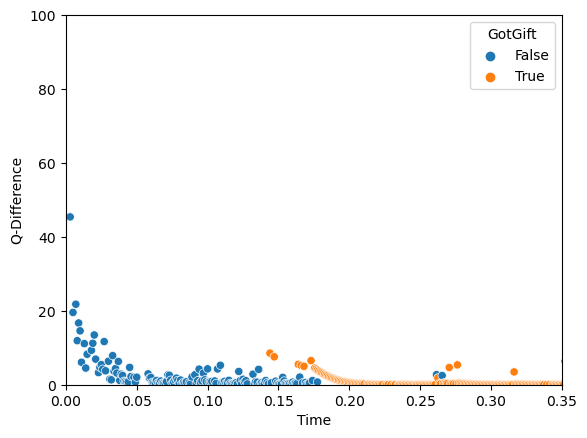

In [8]:
# Create the scatter plot
sns.scatterplot(data=statistics, x="Time", y="Q-Difference", hue="GotGift")

# Set the limits of x and y axes
plt.ylim(0, 100)
plt.xlim(0, 0.35)
# Show the plot
plt.show()

In [9]:
Q

array([[ 0.        ,  0.47829539, -0.59193503,  0.        ],
       [-0.47034219, -0.99214483, -0.76142516,  0.        ],
       [-0.5521537 , -0.86491483, -0.7374681 ,  0.        ],
       [-0.53731051, -0.74581342,  0.        ,  0.        ],
       [ 0.        ,  0.53143934, -0.99484622, -0.36526143],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        , -0.84990536,  0.59048815, -0.26354012],
       [-0.04810358,  0.1174745 ,  0.65609806, -0.5217031 ],
       [ 0.03105724, -0.40951   ,  0.72899937, -0.271     ],
       [ 0.12193036,  0.8099993 ,  0.        , -0.19      ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [-0.1       , -0.081     , -0.1       ,  0.26546009],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [-0.3439    ,  0.89999923,  0.        ,  0.0729    ],
       [ 0.        ,  0.